
---
**<font size="6">PROJECT : 
 Anticipate the electricity consumption needs of buildings </font>**


---
**Author : Alexis Marceau**

# Presentation and objectives

Seattle (Washington, USA) aims to become a carbon-neutral city by 2050.
To this end, an analysis is being carried out specifically on emissions from **non-residential buildings.**


Careful surveys were carried out in 2015 and 2016. However, these surveys are expensive to obtain, and from those already carried out, we will attempt to predict the CO2 emissions and total energy consumption of buildings for which they have not yet been measured.

We will also seek to **evaluate the interest of the "ENERGY STAR Score" for the prediction of emissions**, which is tedious to calculate and expensive.

Useful Information:

- Energy Star is the name of a U.S. government program aimed at promoting energy savings in the United States, also adopted in Canada, Australia, and the European Union.

- The ENERGY STAR score, ranging from 1 to 100, indicates how a building's energy consumption compares to that of similar buildings. A score of 50 represents median energy performance, while a score of 75 or higher indicates that the building is highly efficient and may qualify for ENERGY STAR certification.

- The description of variables can be found on the Seattle website: Seattle Building Energy Benchmarking Data.

- For our modeling purposes, the target variables are the building’s energy consumption (`SiteEnergyUse(kBtu)`) and its CO₂ emissions (`TotalGHGEmissions`).

**This project is divided into two notebooks**:

- First notebook: data cleaning and exploratory data analysis.
- Second notebook: multivariate analysis and various prediction models to best address the problem statement.

# Table of content

- [Presentation and objectives](#presentation-and-objectives)
- [Libraries and options](#libraries-and-options)
- [Cleaning the data](#cleaning-the-data)
- [EDA](#eda)
    - [categorical variables](#categorical-variables)
    - [numerical variables](#numerical-variables)
    - [Correlations](#correlations)
    - [Target variables analysis](#Target-variables-analysis)
- [Saving results](#saving-results)
- [Conclusion](#conclusion)

# Libraries and options 

In [90]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
#display options
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

#"turn-off" warnings
warnings.filterwarnings("ignore")

# Cleaning the data

We have 2 files: one for 2015 and another for 2016.

In [ ]:
#opening files
df_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
df_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [93]:
print("Dimensions du df de 2015: {} ".format(df_2015.shape))
print("Dimensions du df de 2016: {} ".format(df_2016.shape))

Dimensions du df de 2015: (3340, 47) 
Dimensions du df de 2016: (3376, 46) 


We can see that the dimensions of the two dataframes are not identical between the two years. Let's continue our observation

Let's check if we have the same columns between the two dataframes:

In [94]:
if set(df_2015.columns.tolist()) == set(df_2016.columns.tolist()):
    print ("Colonnes toutes identiques")
else :
    print ("Colonnes différentes")

Colonnes différentes


The columns are not all the same, we need to look at that

Columns present in the **2015 file** and absent from the 2016 file:

In [95]:
set(df_2015.columns.tolist())-set(df_2016.columns.tolist())

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

Columns present in the **2016 file** and absent from the 2015 file:

In [96]:
set(df_2016.columns.tolist())-set(df_2015.columns.tolist())

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

We observe between the two datasets variables that seem identical:
- **(1)** : `GHGEmissionsIntensity(kgCO2e/ft2)` and `GHGEmissionsIntensity` respectively for 2015 and 2016,
- **(2)** : `GHGEmissions(MetricTonsCO2e)` and `TotalGHGEmissions` respectively for 2015 and 2016

Let's observe if this is the case using a descriptive analysis:

Let's compare the two variables **(1)**:

In [97]:
print(f"Comparaison des variables: `GHGEmissionsIntensity(kgCO2e/ft2)` et `GHGEmissionsIntensity`:\n\n"
      f"`GHGEmissionsIntensity(kgCO2e/ft2)`:\n",df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),
      f"\n\n`GHGEmissionsIntensity`:\n",df_2016['GHGEmissionsIntensity'].describe())

Comparaison des variables: `GHGEmissionsIntensity(kgCO2e/ft2)` et `GHGEmissionsIntensity`:

`GHGEmissionsIntensity(kgCO2e/ft2)`:
 count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64 

`GHGEmissionsIntensity`:
 count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64


The two variables **(1)** are of the same order.

Let's compare the two variables **(2)**:

In [98]:
print(f"Comparaison des variables: `GHGEmissions(MetricTonsCO2e)` et `TotalGHGEmissions`:\n\n"
      f"`GHGEmissions(MetricTonsCO2e)`:\n",df_2015['GHGEmissions(MetricTonsCO2e)'].describe(),
      f"\n\n`TotalGHGEmissions`:\n",df_2016['TotalGHGEmissions'].describe())

Comparaison des variables: `GHGEmissions(MetricTonsCO2e)` et `TotalGHGEmissions`:

`GHGEmissions(MetricTonsCO2e)`:
 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64 

`TotalGHGEmissions`:
 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64


Here too, the two **(2)** variables are of the same order

We can then rename them identically, as well as the `How` columns for 2015 and `Comments` for 2016.

In [99]:
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Comment':'Comments'})

And we delete columns that are not common to both datasets:  

In [100]:
df_2015.drop(['OtherFuelUse(kBtu)',
              '2010 Census Tracts',
              'Seattle Police Department Micro Community Policing Plan Areas',
              'City Council Districts',
              'Zip Codes',
              'SPD Beats'], axis=1, inplace=True)

Let's take a look at the 2015 dataframe:

In [101]:
df_2015.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  \
0  MAYFLOWER PARK HOTEL                     659000030   
1       PARAMOUNT HOTEL                     659000220   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                       Hotel                  Hotel   
1  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity DefaultData  \
0         1272388.0             249.43                   2.64          No   
1         4448985.0             263.51                   2.38          No   

  Comments ComplianceStatus Outlier  
0      NaN        Compliant     NaN  
1      NaN        Compliant     NaN

In the 2015 file, the `Location` column, containing location information, is nested.

Let's look at the first element:

In [102]:
df_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

We will separate this information to extract nested variables:

In [103]:
import ast
df_2015['Location'] = [ast.literal_eval(str(item)) for index, item in df_2015.Location.iteritems()]
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015['Location'].apply(pd.Series)], axis=1)
df_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in df_2015.human_address.iteritems()]
df_2015 = pd.concat([df_2015.drop(['human_address'], axis=1), df_2015['human_address'].apply(pd.Series)], axis=1)
df_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0   MAYFLOWER PARK HOTEL                     659000030                    7   
1        PARAMOUNT HOTEL                     659000220                    7   
2           WESTIN HOTEL                     659000475                    7   
3              HOTEL MAX                     659000640                    7   
4  WARWICK SEATTLE HOTEL                     659000970                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   
3                 643.2           28229320.0             28363444.0   
4              

Let's compare the 2015 df with the 2016 df:

In [104]:
df_2015.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  MAYFLOWER PARK HOTEL                     659000030                    7   
1       PARAMOUNT HOTEL                     659000220                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                       Hotel                  Hotel   
1  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   

   NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity DefaultData  \
0         1272388.0             249.43                   2.64          No   
1         4448985.0             263.51                   2.38          No   

  Comments ComplianceStatus Outlier     latitude      longitude  \
0      NaN        Compliant     NaN  47.61219025  -122.33799744   
1      NaN        Compliant     NaN  47.61310583  -122.33335756   

         address     city state    zip  
0  405 OLIVE WAY  SEATTLE    WA  98101  
1    724 PINE ST  SEATTLE    WA  98101

In [105]:
df_2016.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   

           PropertyName          Address     City State  ZipCode  \
0  Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1       Paramount Hotel  724 Pine street  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   

   PropertyGFAParking  PropertyGFABuilding(s)   ListOfAllPropertyUseTypes  \
0                   0                   88434                       Hotel   
1               15064                   88502  Hotel, Parking, Restaurant   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0            7226362.5              7456910.0       2003882.0   
1            8387933.0              8664479.0             0.0   

   Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
0      1.156514e+06          3946027.0         12764.52930         1276453.0   
1      9.504252e+05          3242851.0         51450.81641         5145082.0   

   DefaultData  Comments ComplianceStatus Outlier  TotalGHGEmissions  \
0        False       NaN        Compliant     NaN             249.98   
1        False       NaN        Compliant     NaN             295.86   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86

The new columns are renamed to coincide with those of 2016:

In [106]:
df_2015 = df_2015.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State", 
                                  "zip":"ZipCode"})

Let's see if the columns remain different between the two df :

In [107]:
if set(df_2015.columns.tolist()) == set(df_2016.columns.tolist()):
    print ("Colonnes toutes identiques")
else :
    print ("Colonnes différentes")

Colonnes toutes identiques


Columns are identical

 Let's check that we have the same number of columns:

In [108]:
df_2015.shape

(3340, 46)

In [109]:
df_2016.shape

(3376, 46)

Now let's check that the variable types are identical between the two dataframes

In [110]:
pd.DataFrame([df_2015.dtypes, df_2016.dtypes])

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
0         int64    int64       object              object       object   
1         int64    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
0             int64        float64            int64              int64   
1           float64          int64            int64              int64   

  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                  int64                    object                 object   
1                  int64                    object                 object   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                   float64                       object   
1                   float64                       object   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         float64                      object   
1                         float64                      object   

  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified ENERGYSTARScore  \
0                        float64                   object         float64   
1                        float64                   object         float64   

  SiteEUI(kBtu/sf) SiteEUIWN(kBtu/sf) SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)  \
0          float64            float64            float64              float64   
1          float64            float64            float64              float64   

  SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh)  \
0             float64               float64        float64          float64   
1             float64               float64        float64          float64   

  Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) TotalGHGEmissions  \
0           float64            float64          float64           float64   
1           float64            float64          float64           float64   

  GHGEmissionsIntensity DefaultData Comments ComplianceStatus Outlier  \
0               float64      object   object           object  object   
1               float64        bool  float64           object  object   

  Latitude Longitude Address    City   State  ZipCode  
0   object    object  object  object  object   object  
1  float64   float64  object  object  object  float64

We can see that the columns `Latitude`,`Longitude`,`ZipCode` are in type object on df_2015 and type float on df_2016, let's correct that:

In [111]:
df_2015[['Latitude','Longitude', 'ZipCode']] = df_2015[['Latitude','Longitude', 'ZipCode']].astype('float64')

**The two datasets, 2015 and 2016, are now identical, and we're going to combine them into a single dataset that we'll call `df`**:

In [112]:
df = pd.concat([df_2015[df_2016.columns],df_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
df.shape

(6716, 46)

---

Let's look at our concatenated dataframe:

In [113]:
df.head(10)

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
0              1      2015        NonResidential                 Hotel   
1              2      2015        NonResidential                 Hotel   
2              3      2015        NonResidential                 Hotel   
3              5      2015        NonResidential                 Hotel   
4              8      2015        NonResidential                 Hotel   
5              9      2015    Nonresidential COS                 Other   
6             10      2015        NonResidential                 Hotel   
7             11      2015        NonResidential                 Other   
8             12      2015        NonResidential                 Hotel   
9             13      2015  Multifamily MR (5-9)  Mid-Rise Multifamily   

                                  PropertyName          Address     City  \
0                         MAYFLOWER PARK HOTEL    405 OLIVE WAY  SEATTLE   
1                              PARAMOUNT HOTEL      724 PINE ST  SEATTLE   
2                                 WESTIN HOTEL     1900 5TH AVE  SEATTLE   
3                                    HOTEL MAX   620 STEWART ST  SEATTLE   
4                        WARWICK SEATTLE HOTEL    401 LENORA ST  SEATTLE   
5               WEST PRECINCT (SEATTLE POLICE)  810 VIRGINIA ST  SEATTLE   
6                       CAMLIN WORLDMARK HOTEL     1619 9TH AVE  SEATTLE   
7                            PARAMOUNT THEATER      901 PINE ST  SEATTLE   
8  COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE      612 2ND AVE  SEATTLE   
9                                LYON BUILDING      607 3RD AVE  SEATTLE   

  State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0    WA  98101.0                     659000030                    7   
1    WA  98101.0                     659000220                    7   
2    WA  98101.0                     659000475                    7   
3    WA  98101.0                     659000640                    7   
4    WA  98121.0                     659000970                    7   
5    WA  98101.0                     660000560                    7   
6    WA  98101.0                     660000825                    7   
7    WA  98101.0                     660000955                    7   
8    WA  98104.0                     939000080                    7   
9    WA  98104.0                     939000105                    7   

  Neighborhood   Latitude   Longitude  YearBuilt  NumberofBuildings  \
0     DOWNTOWN  47.612190 -122.337997       1927                1.0   
1     DOWNTOWN  47.613106 -122.333358       1996                1.0   
2     DOWNTOWN  47.613349 -122.337699       1969                1.0   
3     DOWNTOWN  47.614216 -122.336609       1926                1.0   
4     DOWNTOWN  47.613754 -122.340924       1980                1.0   
5     DOWNTOWN  47.616439 -122.336764       1999                1.0   
6     DOWNTOWN  47.614114 -122.332741       1926                1.0   
7     DOWNTOWN  47.612902 -122.331309       1926                1.0   
8     DOWNTOWN  47.602589 -122.332553       1904                1.0   
9     DOWNTOWN  47.602784 -122.332149       1910                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0            12.0             88434                   0   
1            11.0            103566               15064   
2            41.0            961990                   0   
3            10.0             61320                   0   
4            18.0            119890               12460   
5             2.0             97288               37198   
6            11.0             83008                   0   
7             8.0            102761                   0   
8            15.0            163984                   0   
9             6.0             63712                1496   

   PropertyGFABuilding(s)              ListOfAllPropertyUseTypes  \
0                   88434                                  Hotel   
1

The project states that **only non-residential buildings will be studied**. To achieve this, the `BuildingType` variable is used to suppress dwellings.

Let's look at the unique values of the variable: `BuildingType`, which is a **classification by type of building in the city.**.

In [114]:
df.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Selection of non-residential buildings (*SPS-District K-12* being a public school).

In [115]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

---

There are 5 variables with similar values: 
- `PrimaryPropertyType`: Primary use of a property (e.g. office, retail store).
- `ListOfAllPropertyUseTypes`: All property uses reported in the Portfolio Manager.
- `LargestPropertyUseType`: Largest use of a property (e.g. office, retail store) in terms of surface area.
- `SecondLargestPropertyUseType`: The second largest use of a property (e.g. office, retail).
- `ThirdLargestPropertyUseType`: The third largest use of a property (e.g. office, retail).

In [116]:
property_use_types_cols = ['LargestPropertyUseType',
                            'PrimaryPropertyType',
                            'SecondLargestPropertyUseType',
                            'ThirdLargestPropertyUseType',
                            'ListOfAllPropertyUseTypes']

Let's check the missing values of these columns

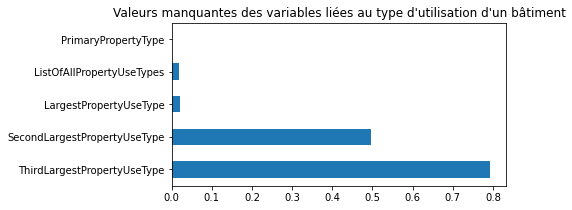

In [117]:
df[property_use_types_cols].isnull().mean().sort_values(ascending=False).plot(kind="barh", figsize=(6, 3))
plt.title("Valeurs manquantes des variables liées au type d'utilisation d'un bâtiment")
plt.show()

- The `PrimaryPropertyType` variable is 100% complete.
- `ListOfAllPropertyUseTypes` and `LargestPropertyUseType` have only minimal missing values. 
- `SecondLargestPropertyUseType` and especially `ThirdLargestPropertyUseType` show significant proportions of missing data, with the latter nearing 80%. Due to the high percentage of missing values in `ThirdLargestPropertyUseType`, this variable may be removed in later stages of data cleaning to ensure data quality.

Let’s examine the distribution of the `PrimaryPropertyType` variable to understand the main types of building usage in our dataset. By using df.PrimaryPropertyType.value_counts(), we can see the frequency of each building type, which helps us identify the most common and least common usage categories.

In [118]:
df.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    588
Other                          502
Large Office                   344
K-12 School                    275
Mixed Use Property             220
Retail Store                   191
Non-Refrigerated Warehouse     187
Warehouse                      187
Hotel                          149
Worship Facility               143
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
Residence Hall                  21
College/University              21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      13
Restaurant\n                    11
Laboratory                      11
Low-Rise Multifamily             5
SPS-District K-12   

The PrimaryPropertyType distribution shows that "Small- and Mid-Sized Office" and "Other" are the most common building types, followed by "Large Office" and "K-12 School." Less frequent categories, like "Laboratory" and "Low-Rise Multifamily," indicate a smaller representation in the dataset. This variety will guide our analysis focus.

It would be beneficial to correct typos and consider grouping similar categories for a cleaner analysis.

Let's correct the “\n” and try to group a few categories together:

In [119]:
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('\n','')

In [120]:
df.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    588
Other                          502
Large Office                   344
K-12 School                    275
Mixed Use Property             220
Retail Store                   191
Warehouse                      187
Non-Refrigerated Warehouse     187
Hotel                          149
Worship Facility               143
Distribution Center            106
Medical Office                  82
Self-Storage Facility           56
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Refrigerated Warehouse          25
University                      24
Restaurant                      24
College/University              21
Residence Hall                  21
Hospital                        20
Residence Hall/Dormitory        15
Laboratory                      11
Low-Rise Multifamily             5
SPS-District K-12                4
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [ ]:
#We remove the special characters
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.lower().str.capitalize()
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('-','')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('/','')

In [ ]:
df.PrimaryPropertyType.value_counts() #checking

Small and midsized office     588
Other                         502
Large office                  344
K12 school                    275
Mixed use property            220
Retail store                  191
Warehouse                     187
Nonrefrigerated warehouse     187
Hotel                         149
Worship facility              143
Distribution center           106
Medical office                 82
Selfstorage facility           56
Supermarket  grocery store     40
Senior care community          39
Supermarketgrocery store       36
Refrigerated warehouse         25
University                     24
Restaurant                     24
Collegeuniversity              21
Residence hall                 21
Hospital                       20
Residence halldormitory        15
Laboratory                     11
Lowrise multifamily             5
Spsdistrict k12                 4
Office                          3
Name: PrimaryPropertyType, dtype: int64

In [ ]:
#We group together the following categories
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('Office','Small and midsized office')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('Spsdistrict k12','K12')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('K12 school','K12')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('Collegeuniversity','University')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('Residence halldormitory','Residence')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('Residence hall','Residence')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('Supermarketgrocery store','Supermarket')
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('Supermarket  grocery store','Supermarket')

In [ ]:
df.PrimaryPropertyType.value_counts() #checking

Small and midsized office    591
Other                        502
Large office                 344
K12                          279
Mixed use property           220
Retail store                 191
Warehouse                    187
Nonrefrigerated warehouse    187
Hotel                        149
Worship facility             143
Distribution center          106
Medical office                82
Supermarket                   76
Selfstorage facility          56
University                    45
Senior care community         39
Residence                     36
Refrigerated warehouse        25
Restaurant                    24
Hospital                      20
Laboratory                    11
Lowrise multifamily            5
Name: PrimaryPropertyType, dtype: int64

The `PrimaryPropertyType` variable is cleaned. We should also dropped Residence category

--- 

In [125]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName         Address     City State  ZipCode  \
0   MAYFLOWER PARK HOTEL   405 OLIVE WAY  SEATTLE    WA  98101.0   
1        PARAMOUNT HOTEL     724 PINE ST  SEATTLE    WA  98101.0   
2           WESTIN HOTEL    1900 5TH AVE  SEATTLE    WA  98101.0   
3              HOTEL MAX  620 STEWART ST  SEATTLE    WA  98101.0   
4  WARWICK SEATTLE HOTEL   401 LENORA ST  SEATTLE    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood   Latitude  \
0                     659000030                    7     DOWNTOWN  47.612190   
1                     659000220                    7     DOWNTOWN  47.613106   
2                     659000475                    7     DOWNTOWN  47.613349   
3                     659000640                    7     DOWNTOWN  47.614216   
4                     659000970                    7     DOWNTOWN  47.613754   

    Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.337997       1927                1.0            12.0             88434   
1 -122.333358       1996                1.0            11.0            103566   
2 -122.337699       1969                1.0            41.0            961990   
3 -122.336609       1926                1.0            10.0             61320   
4 -122.340924       1980                1.0            18.0            119890   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2                   0                  961990  Hotel, Parking, Swimming Pool   
3                   0                   61320                          Hotel   
4               12460                  107430  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   757243.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                      Parking                         100000.0   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2               Swimming Pool                             0.0   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             65.0              78.9   
1                      NaN             51.0              94.4   
2                      NaN             18.0              96.6   
3                      NaN              1.0             460.4   
4                      NaN             67.0             120.1   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0                80.3               173.5                 175.1   
1                99.0               191.3                 195.2   
2                99.7          

Let's focus now on geographic data variables :

In [126]:
var_geo = ['Address',
           'City',
           'State',
           'ZipCode',
           'Neighborhood',
           'Latitude',
           'Longitude']

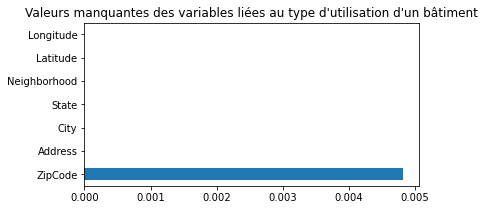

In [127]:
df[var_geo].isnull().mean().sort_values(ascending=False).plot(kind="barh", figsize=(6, 3))
plt.title("Valeurs manquantes des variables liées au type d'utilisation d'un bâtiment")
plt.show()

All variables have a completeness rate of 100% or very close to it. I choose to keep only the `Latitude`, `Longitude`, `Address` and `Neighborhood` data.

In [ ]:
# deletion of variables of no interest to us
df.drop(['State','ZipCode','City'], axis=1, inplace=True)

Let's look at the values of `Neighborhood` :

In [129]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

Let's correct the values:

In [130]:
df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
df['Neighborhood']=df['Neighborhood'].map(lambda x: x.upper())

In [131]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

--- 

In [132]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName         Address TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL   405 OLIVE WAY                     659000030   
1        PARAMOUNT HOTEL     724 PINE ST                     659000220   
2           WESTIN HOTEL    1900 5TH AVE                     659000475   
3              HOTEL MAX  620 STEWART ST                     659000640   
4  WARWICK SEATTLE HOTEL   401 LENORA ST                     659000970   

   CouncilDistrictCode Neighborhood   Latitude   Longitude  YearBuilt  \
0                    7     DOWNTOWN  47.612190 -122.337997       1927   
1                    7     DOWNTOWN  47.613106 -122.333358       1996   
2                    7     DOWNTOWN  47.613349 -122.337699       1969   
3                    7     DOWNTOWN  47.614216 -122.336609       1926   
4                    7     DOWNTOWN  47.613754 -122.340924       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0            12.0             88434                   0   
1                1.0            11.0            103566               15064   
2                1.0            41.0            961990                   0   
3                1.0            10.0             61320                   0   
4                1.0            18.0            119890               12460   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  961990  Hotel, Parking, Swimming Pool   
3                   61320                          Hotel   
4                  107430  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   757243.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                      Parking                         100000.0   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2               Swimming Pool                             0.0   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             65.0              78.9   
1                      NaN             51.0              94.4   
2                      NaN             18.0              96.6   
3                      NaN              1.0             460.4   
4                      NaN             67.0             120.1   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0                80.3               173.5                 175.1   
1                99.0               191.3                 195.2   
2                99.7               242.7                 246.5   
3               462.5               636.3                 643.2   
4               122.1               228.8

In this step, we are removing unnecessary and redundant variables from the dataset to simplify our analysis. The TaxParcelIdentificationNumber variable is dropped as it serves a similar purpose to OSEBuildingID for building identification. Additionally, NaturalGas(therms) and Electricity(kWh) are removed due to redundancy, as they likely overlap with other energy-related variables.

In [ ]:
##Deleting unnecessary variables
df.drop('TaxParcelIdentificationNumber', axis=1, inplace=True) #variable similaire à OSEBuildingID
#Suppression des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
df.drop(redundant_features, axis=1, inplace=True)

In [134]:
df.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   

           PropertyName        Address  CouncilDistrictCode Neighborhood  \
0  MAYFLOWER PARK HOTEL  405 OLIVE WAY                    7     DOWNTOWN   
1       PARAMOUNT HOTEL    724 PINE ST                    7     DOWNTOWN   

    Latitude   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0  47.612190 -122.337997       1927                1.0            12.0   
1  47.613106 -122.333358       1996                1.0            11.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                       Hotel                  Hotel   
1  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) DefaultData Comments  \
0       2023032.0          3686160.0         1272388.0          No      NaN   
1             0.0          3905411.0         4448985.0          No      NaN   

  ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0        Compliant     NaN             249.43                   2.64  
1        Compliant     NaN             263.51                   2.38

First, we examine the unique values in the `ComplianceStatus` column, revealing categories such as 'Compliant', 'Error - Correct Default Data', 'Missing Data', and 'Non-Compliant'. To clean the data, we replace the values 'Missing Data' and 'Error - Correct Default Data' with NaN, as they indicate a lack of valid information. This helps us handle missing or unreliable entries more consistently in later analyses.

In [135]:
df.ComplianceStatus.unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [136]:
#valeurs mises à nan
df['ComplianceStatus'].replace('Missing Data', np.nan, inplace=True)
df['ComplianceStatus'].replace('Error - Correct Default Data', np.nan, inplace=True)

**Missing values**

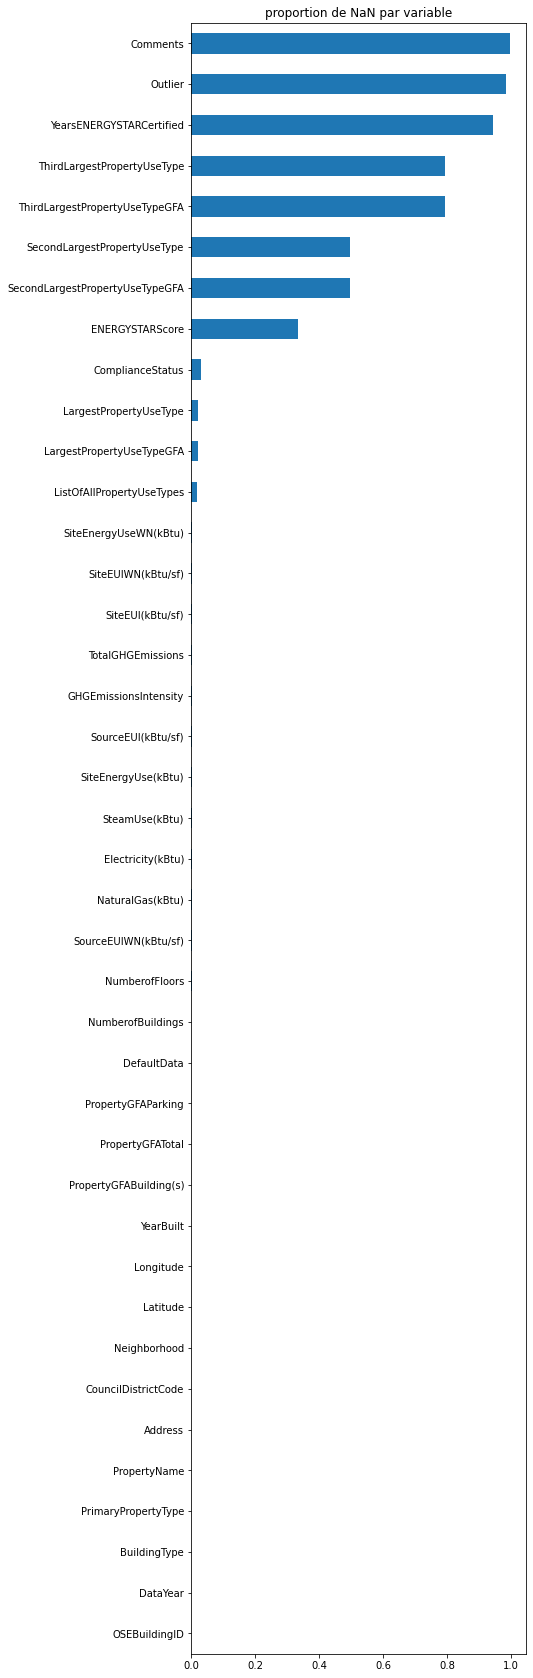

In [137]:
df.isnull().mean().sort_values(ascending=True).plot(kind="barh", figsize=(6, 30))
plt.title("proportion de NaN par variable")
plt.show()

- This chart shows the proportion of missing values for each variable. The columns with the highest percentage of missing values are `Comments`, `Outlier`, and `YearsENERGYSTARCertified` are non-essential and will be removed to simplify the dataset.

 - `ThirdLargestPropertyUseType`,`ThirdLargestPropertyUseTypeGFA`, `SecondLargestPropertyUseType`, `SecondLargestPropertyUseTypeGFA`, and `ENERGYSTARScore` are likely useful for analysis, imputation methods will be considered to fill in the missing data and retain these variables.

- Meanwhile, variables like `LargestPropertyUseType`, `Yearbuilt` have minimal missing data, indicating they are more complete and reliable for analysis.

In [ ]:
# Removing columns with too many missing values ​​(>80%)
to_drop_na = ['Outlier','Comments','YearsENERGYSTARCertified']
df.drop(to_drop_na, axis=1, inplace=True)

In [ ]:
# Also removing unnecessary columns
to_drop_useless = [ 'ComplianceStatus', #info on the completeness of the data to be deleted
                    'DefaultData'
                  ]
                   
df.drop(to_drop_useless, axis=1, inplace=True)

In [140]:
df.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   

           PropertyName        Address  CouncilDistrictCode Neighborhood  \
0  MAYFLOWER PARK HOTEL  405 OLIVE WAY                    7     DOWNTOWN   
1       PARAMOUNT HOTEL    724 PINE ST                    7     DOWNTOWN   

    Latitude   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0  47.612190 -122.337997       1927                1.0            12.0   
1  47.613106 -122.333358       1996                1.0            11.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                       Hotel                  Hotel   
1  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                             NaN             65.0              78.9   
1                          4622.0             51.0              94.4   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0                80.3               173.5                 175.1   
1                99.0               191.3                 195.2   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0            6981428.0              7097539.0       2023032.0   
1            8354235.0              8765788.0             0.0   

   Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0          3686160.0         1272388.0             249.43   
1          3905411.0         4448985.0             263.51   

   GHGEmissionsIntensity  
0                   2.64  
1                   2.38

Here, we perform a descriptive analysis to identify any negative values in the dataset. This step is crucial for detecting inconsistencies, especially in variables related to surface area (`PropertyGFABuilding(s)`, `PropertyGFAParking...`) or energy consumption, as negative values in these contexts are not realistic and may indicate data entry errors. Identifying these values helps us decide on necessary corrections or data cleaning actions.

In [141]:
df.describe().min()

OSEBuildingID                           1.000000
DataYear                                0.500068
CouncilDistrictCode                     1.000000
Latitude                                0.048102
Longitude                            -122.411820
YearBuilt                              32.709772
NumberofBuildings                       0.000000
NumberofFloors                          0.000000
PropertyGFATotal                     3318.000000
PropertyGFAParking                     -2.000000
PropertyGFABuilding(s)             -50550.000000
LargestPropertyUseTypeGFA            3247.000000
SecondLargestPropertyUseTypeGFA         0.000000
ThirdLargestPropertyUseTypeGFA          0.000000
ENERGYSTARScore                         1.000000
SiteEUI(kBtu/sf)                        0.000000
SiteEUIWN(kBtu/sf)                      0.000000
SourceEUI(kBtu/sf)                     -2.000000
SourceEUIWN(kBtu/sf)                   -2.100000
SiteEnergyUse(kBtu)                     0.000000
SiteEnergyUseWN(kBtu

We have negative values ​​for the variables `PropertyGFAParking` and `PropertyGFABuilding(s)`.

In [142]:
df[df['PropertyGFAParking']<0]

OSEBuildingID  DataYear    BuildingType        PrimaryPropertyType  \
3136          29551      2015  NonResidential  Small and midsized office   

       PropertyName        Address  CouncilDistrictCode Neighborhood  \
3136  625 5TH AVE S  625 5TH AVE S                    2     DOWNTOWN   

       Latitude   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3136  47.597252 -122.327747       2000                1.0            11.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3136             68452                  -2                   68454   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3136       Bank Branch, Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3136                    61665.0                  Bank Branch   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3136                           6787.0                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3136                             NaN             81.0              53.6   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3136                58.3               168.4                 182.9   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3136            3670298.0              3988260.0             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
3136          3670451.0               0.0              25.59   

      GHGEmissionsIntensity  
3136                   0.14

In [143]:
df[df['PropertyGFABuilding(s)']<0]

OSEBuildingID  DataYear    BuildingType        PrimaryPropertyType  \
3139          29788      2015  NonResidential  Small and midsized office   
3322          50002      2015  NonResidential                      Other   

                        PropertyName           Address  CouncilDistrictCode  \
3139   QUEEN ANNE SQUARE WEST (2013)   220 W MERCER ST                    7   
3322  FREEWAY MOTORS UNIVERSITY AUDI  4741 11TH AVE NE                    4   

               Neighborhood   Latitude   Longitude  YearBuilt  \
3139  MAGNOLIA / QUEEN ANNE  47.624968 -122.359705       1982   
3322              NORTHEAST  47.664111 -122.316639       2014   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3139                1.0             5.0             54015               97325   
3322                1.0             3.0             33648               84198   

      PropertyGFABuilding(s)       ListOfAllPropertyUseTypes  \
3139                  -43310                          Office   
3322                  -50550  Automobile Dealership, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3139                 Office                    54015.0   
3322                Parking                    83600.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3139                          NaN                              NaN   
3322        Automobile Dealership                          39000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3139                         NaN                             NaN   
3322                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
3139             65.0              64.0                64.0   
3322              NaN              35.6                35.6   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
3139               200.9                 200.9            3455247.0   
3322               111.9                 111.9            1389553.0   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
3139              3455247.0             0.0          3455391.0   
3322              1389553.0             0.0          1389610.0   

      NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  
3139               0.0              24.09                   0.17  
3322               0.0               9.69                   0.11

Here, we identify rows with negative values in the PropertyGFAParking and PropertyGFABuilding(s) columns to assess the extent of these anomalies. After confirming the rows with invalid data, we drop them from the dataset to maintain data integrity, as negative surface area values are not realistic.

In [144]:
index_to_drop=df[df['PropertyGFAParking']<0].index
df.drop(index_to_drop, inplace=True)
index_to_drop=df[df['PropertyGFABuilding(s)']<0].index
df.drop(index_to_drop, inplace=True)

Here, we are preparing to clean the NumberofBuildings and NumberofFloors columns. 

In [145]:
df['NumberofBuildings'].unique()

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,   0.,
        27.,  14.,   9.,   5.,  nan,   8.,  23., 111.])

First, we address any missing values in NumberofBuildings by filling them with 0 and then replacing 0 values with 1, assuming that every property has at least one building. This ensures there are no null or unrealistic values.

In [146]:
df['NumberofBuildings'].fillna(0, inplace=True)
df['NumberofBuildings'].replace(0, 1, inplace=True)

In [ ]:
df['NumberofBuildings'].unique() #checking

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,  27.,
        14.,   9.,   5.,   8.,  23., 111.])

In [148]:
df['NumberofFloors'].unique()

array([12., 11., 41., 10., 18.,  2.,  8., 15., 25.,  9., 33.,  6., 28.,
        5., 19.,  7.,  1.,  3.,  4., 24., 20., 34.,  0., 16., 23., 17.,
       36., 22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46.,
       30., 56., 27., 76., 99., nan, 39.])

We are now addressing missing or zero values in the NumberofFloors column. First, we replace any missing values with 0, then we replace 0 values with 1 under the assumption that every building has at least one floor. This ensures the data is consistent and avoids unrealistic values in the dataset.

In [149]:
df['NumberofFloors'].fillna(0, inplace=True)
df['NumberofFloors'].replace(0, 1, inplace=True)

In [ ]:
df['NumberofFloors'].unique() #checking

array([12., 11., 41., 10., 18.,  2.,  8., 15., 25.,  9., 33.,  6., 28.,
        5., 19.,  7.,  1.,  3.,  4., 24., 20., 34., 16., 23., 17., 36.,
       22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46., 30.,
       56., 27., 76., 99., 39.])

In this step, we are visualizing the geographic distribution of buildings using their latitude and longitude coordinates. Each blue circle represents a building location, allowing us to verify the accuracy of the location data.

In [151]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=11)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']], 
                      popup=df.iloc[i]['Address'], radius =100).add_to(map_osm)
map_osm

Building are well located in Seattle. Additionally, it would be interesting to overlay energy consumption and CO₂ emissions on this map to observe potential correlations with geographic location. For example, we might hypothesize that buildings in the city center have higher energy consumption than those on the outskirts due to denser occupancy and usage patterns.

---

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 3375
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3313 non-null   int64  
 1   DataYear                         3313 non-null   int64  
 2   BuildingType                     3313 non-null   object 
 3   PrimaryPropertyType              3313 non-null   object 
 4   PropertyName                     3313 non-null   object 
 5   Address                          3313 non-null   object 
 6   CouncilDistrictCode              3313 non-null   int64  
 7   Neighborhood                     3313 non-null   object 
 8   Latitude                         3313 non-null   float64
 9   Longitude                        3313 non-null   float64
 10  YearBuilt                        3313 non-null   int64  
 11  NumberofBuildings                3313 non-null   float64
 12  NumberofFloors      

In the list of columns we can see variables with **WN** suffixes: WN suffixes: "Weather Normalized" - These are the measurements normalized with the weather conditions. For the purposes of our analysis, the weather will not be taken into account.

So we'll start by removing these variables:

In [153]:
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

In [ ]:
df.drop(search_componant(df,'WN'), axis=1, inplace=True)

**Reminder: In our modeling, the variables to be predicted are the building's energy consumption `(SiteEnergyUse(kBtu))` and its CO2 emissions `(TotalGHGEmissions)`.**

Some lines have missing values ​​for these variables, so we will delete them: let's see how many

In [155]:
df[df['SiteEnergyUse(kBtu)'].isnull()]

OSEBuildingID  DataYear       BuildingType        PrimaryPropertyType  \
62               87      2015  SPS-District K-12                        K12   
719           19694      2015  SPS-District K-12                        K12   
1358          21570      2015  SPS-District K-12                        K12   
1360          21578      2015  SPS-District K-12                        K12   
2108          24408      2015  SPS-District K-12                        K12   
2381          25361      2015  SPS-District K-12                        K12   
2406          25451      2015     NonResidential                 Restaurant   
578             773      2016     NonResidential  Small and midsized office   
2670          26532      2016     NonResidential         Mixed use property   

                                        PropertyName                 Address  \
62    ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT)        3701 SW 104TH ST   
719                              MANN (SPS-DISTRICT)        2410 E CHERRY ST   
1358             PINEHURST ELEMENTARY (SPS-DISTRICT)       11530 12TH AVE NE   
1360                   GENESEE SCHOOL (SPS-DISTRICT)      5012 SW GENESEE ST   
2108                   WILSON-PACIFIC (SPS-DISTRICT)          1330 N 90TH ST   
2381               DECATUR ELEMENTARY (SPS-DISTRICT)        7711 43RD AVE NE   
2406                             YALE STREET LANDING     1001 FAIRVIEW AVE N   
578                                 SEATTLE BUILDING         215 COLUMBIA ST   
2670                                KALBERG BUILDING  4515 UNIVERSITY WAY NE   

      CouncilDistrictCode Neighborhood   Latitude   Longitude  YearBuilt  \
62                      1    SOUTHWEST  47.509354 -122.378222       1948   
719                     3      CENTRAL  47.608185 -122.300521       1925   
1358                    5        NORTH  47.713343 -122.314590       1950   
1360                    1    SOUTHWEST  47.565464 -122.396881       1949   
2108                    5    NORTHWEST  47.695489 -122.340188       1953   
2381                    4    NORTHEAST  47.685590 -122.282590       1961   
2406                    3   LAKE UNION  47.629180 -122.331695       1978   
578                     7     DOWNTOWN  47.603800 -122.332930       1924   
2670                    4    NORTHEAST  47.661820 -122.313450       1928   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
62                  1.0             2.0             53352                   0   
719                 1.0             2.0             37327                   0   
1358                1.0             1.0             34005                   0   
1360                1.0             1.0             41221                   0   
2108                1.0             1.0            110830                   0   
2381                1.0             1.0             43578                   0   
2406                1.0             2.0             26519                   0   
578                 1.0             4.0             63150                   0   
2670                1.0             2.0             20760                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
62                     53352               K-12 School            K-12 School   
719                    37327               K-12 School            K-12 School   
1358                   34005               K-12 School            K-12 School   
1360                   41221               K-12 School            K-12 School   
2108                  110830               K-12 School            K-12 School   
2381                   43578               K-12 School            K-12 School   
2406                   26519        Office, Restaurant             Restaurant   
578                    63150                       NaN                    NaN   
2670                   20760                       NaN                    NaN   

      LargestPropertyUseTypeGFA

We filter the dataset to keep only rows where both SiteEnergyUse(kBtu) and TotalGHGEmissions have valid (non-null) values. This ensures that our analysis and models have complete data for these key variables

In [156]:
df = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()))]

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 0 to 3375
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3304 non-null   int64  
 1   DataYear                         3304 non-null   int64  
 2   BuildingType                     3304 non-null   object 
 3   PrimaryPropertyType              3304 non-null   object 
 4   PropertyName                     3304 non-null   object 
 5   Address                          3304 non-null   object 
 6   CouncilDistrictCode              3304 non-null   int64  
 7   Neighborhood                     3304 non-null   object 
 8   Latitude                         3304 non-null   float64
 9   Longitude                        3304 non-null   float64
 10  YearBuilt                        3304 non-null   int64  
 11  NumberofBuildings                3304 non-null   float64
 12  NumberofFloors      

In this step, we are averaging key variables across two years (2015 and 2016) for each unique building (OSEBuildingID). We start by identifying the columns to average, then calculate the mean for these variables using the groupby function. Finally, we merge this averaged data back with the original dataset.

Since each building can appear multiple times (once for each year), taking the average for these variables provides a more stable representation of each building's characteristics over time. This approach reduces year-to-year variability and allows us to focus on each building as a single entry, making the dataset more consistent for analysis.

In [158]:
df.DataYear.value_counts()

2016    1664
2015    1640
Name: DataYear, dtype: int64

In [159]:
mean_columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
                'ENERGYSTARScore', 'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)','Electricity(kBtu)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [160]:
OSEBuilding_means = df[['OSEBuildingID']+mean_columns].groupby('OSEBuildingID').mean()
OSEBuilding_means.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  \
OSEBuildingID                                                        
1                            1.0            12.0           88434.0   
2                            1.0            11.0          103566.0   
3                            1.0            41.0          959050.0   
5                            1.0            10.0           61320.0   
8                            1.0            18.0          147735.0   

               ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
OSEBuildingID                                                          
1                         62.5         80.299998          178.000000   
2                         56.0         94.600002          183.700003   
3                         30.5         96.300000          242.299997   
5                         28.5        285.600002          426.249998   
8                         71.0        117.450002          220.099997   

               SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
OSEBuildingID                                                           
1                       7103895.25    2.013457e+06          3816093.5   
2                       8371084.00    0.000000e+00          3574131.0   
3                      72858840.00    2.061348e+07         49644549.5   
5                      17511952.00    1.283648e+07          2768973.5   
8                      14500852.50    0.000000e+00          5717426.0   

               NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  
OSEBuildingID                                                              
1                     1274420.5            249.705                  2.735  
2                     4797033.5            279.685                  2.620  
3                     2601850.0           2075.380                  2.055  
5                     1906553.5           1111.385                 18.025  
8                     8783551.5            506.355                  3.450

In [161]:
duplicate_building = df.drop_duplicates(subset=['OSEBuildingID'], keep='last')
duplicate_building.drop(mean_columns, axis=1, inplace=True)
df = pd.merge(duplicate_building, OSEBuilding_means, how='left', on='OSEBuildingID')

In [162]:
df.DataYear.value_counts()

2016    1664
2015      32
Name: DataYear, dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1695
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1696 non-null   int64  
 1   DataYear                         1696 non-null   int64  
 2   BuildingType                     1696 non-null   object 
 3   PrimaryPropertyType              1696 non-null   object 
 4   PropertyName                     1696 non-null   object 
 5   Address                          1696 non-null   object 
 6   CouncilDistrictCode              1696 non-null   int64  
 7   Neighborhood                     1696 non-null   object 
 8   Latitude                         1696 non-null   float64
 9   Longitude                        1696 non-null   float64
 10  YearBuilt                        1696 non-null   int64  
 11  PropertyGFAParking               1696 non-null   int64  
 12  PropertyGFABuilding(

We use a heatmap to visualize missing values across the dataset after dropping unnecessary columns, allowing us to identify areas that still require data cleaning

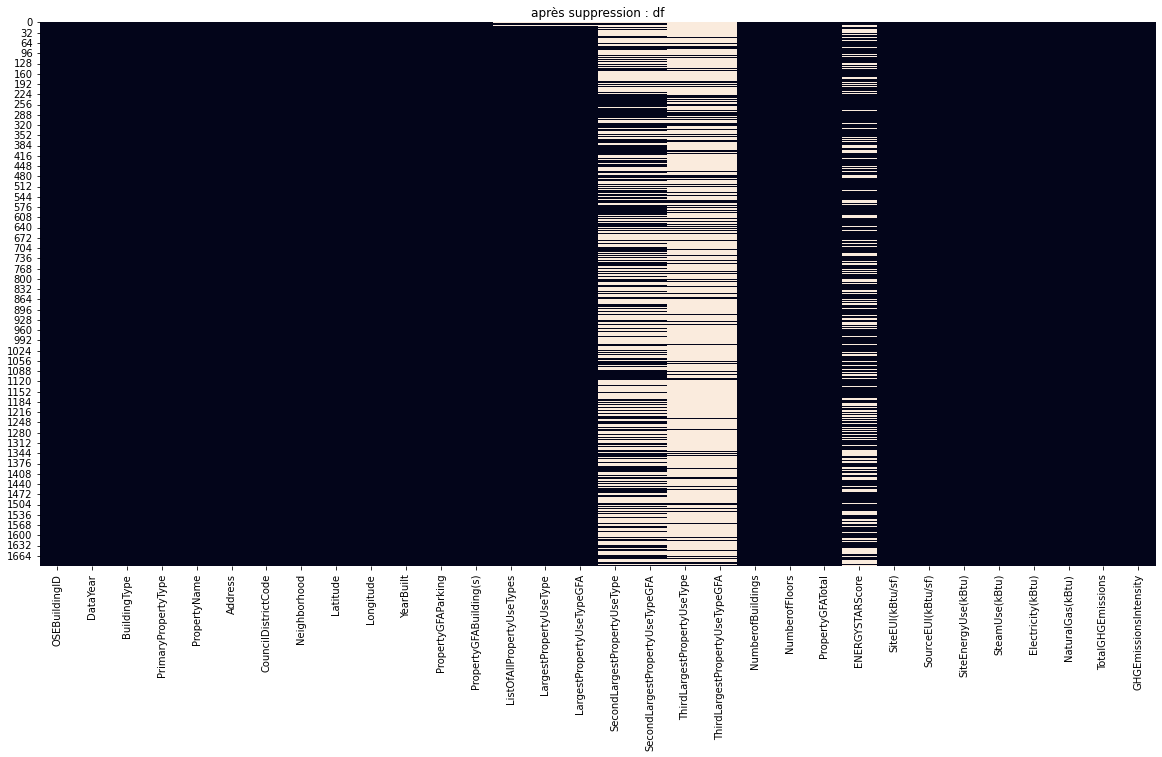

In [164]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.title("après suppression : df")
plt.show()

Let's now see the the distribution of `ENERGYSTARScore` :

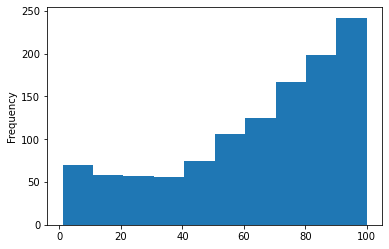

In [165]:
df.ENERGYSTARScore.plot.hist()
plt.show()

This histogram of ENERGYSTARScore shows that the distribution is skewed towards higher scores, with most buildings scoring between 70 and 100. This suggests that many buildings in the dataset are relatively energy efficient, while fewer buildings have low scores, indicating poor energy performance.

In [166]:
df.ENERGYSTARScore.skew()

-0.7563325556557148

The skewness of `ENERGYSTARScore` is -0.756, indicating a slight negative skew. This is consistent with the previous histogram, where most buildings have high scores (70-100), while fewer buildings have lower scores. This negative skew confirms that energy efficiency scores are generally high, with a few lower outliers

In the next step, we are filling missing values in the `ENERGYSTARScore` column with the median score. This imputation method replaces NaN values with a central value that minimizes the impact of outliers.

In [167]:
df['ENERGYSTARScore'] = df['ENERGYSTARScore'].fillna(df['ENERGYSTARScore'].median())

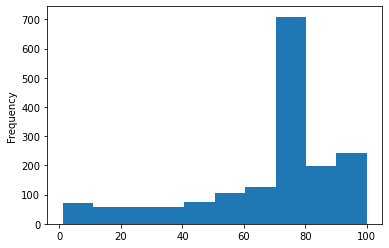

In [168]:
df.ENERGYSTARScore.plot.hist()
plt.show()

Now let's look at the remaining missing values

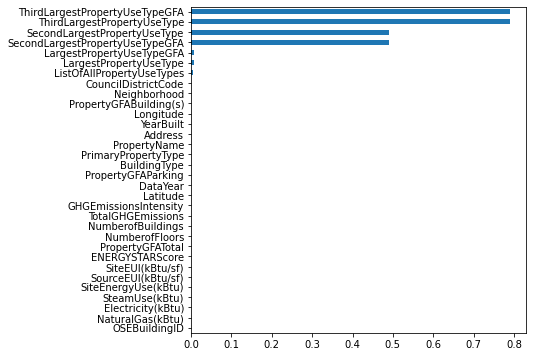

In [169]:
df.isnull().mean().sort_values(ascending=True).plot(kind="barh", figsize=(6, 6))
plt.show()

In [172]:
df['LargestPropertyUseTypeGFA'] = df['LargestPropertyUseTypeGFA'].fillna(df['LargestPropertyUseTypeGFA'].median())

Here, we impute missing values in the LargestPropertyUseTypeGFA variable using the median. This variable is important for our analysis and has a relatively low proportion of missing values, making median imputation a suitable choice. For now, we are choosing not to address the other variables with high missing value proportions, as their high level of incompleteness could lead to unreliable imputation. We will chose later if we use them for the model training.

# EDA

## categorical variables

We analyze the categorical variables to understand their distribution, including the count, unique values, and most common categories. This overview helps identify dominant values and high-cardinality variables for further analysis.

In [175]:
df.describe(exclude="number").transpose()

count unique                        top  freq
BuildingType                  1696      5             NonResidential  1487
PrimaryPropertyType           1696     22  Small and midsized office   302
PropertyName                  1696   1692           Bayview Building     2
Address                       1696   1675         2203 Airport Way S     4
Neighborhood                  1696     13                   DOWNTOWN   370
ListOfAllPropertyUseTypes     1688    378                     Office   144
LargestPropertyUseType        1684     57                     Office   507
SecondLargestPropertyUseType   865     47                    Parking   343
ThirdLargestPropertyUseType    356     39                     Office    49

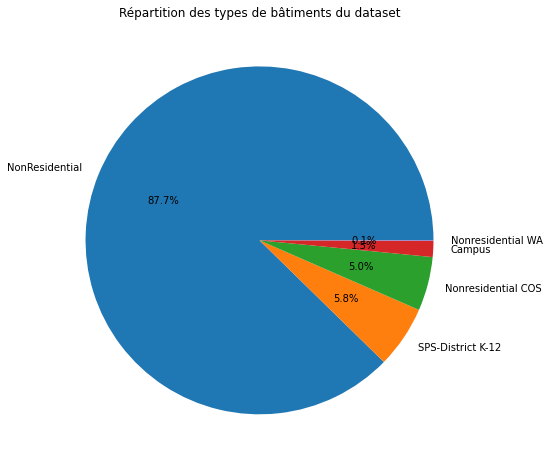

In [176]:
df['BuildingType'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.1f%%',title='Répartition des types de bâtiments du dataset',label='',figsize=(8,8))
plt.show()

This pie chart shows the distribution of building types in the dataset. We observe that the vast majority (87.7%) are classified as "NonResidential," while other categories like "SPS-District K-12" and "Nonresidential COS" represent smaller proportions. 

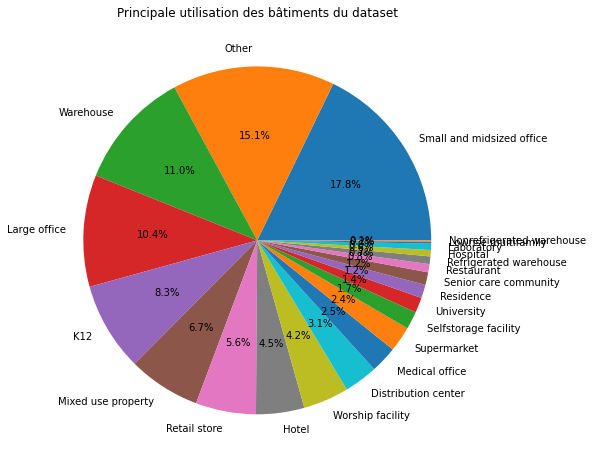

In [177]:
df['PrimaryPropertyType'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.1f%%',title='Principale utilisation des bâtiments du dataset',label='',figsize=(8,8))
plt.show()

This pie chart illustrates the primary usage of buildings in the dataset. The most common types are "Small and midsized office" (17.8%), "Other" (15.1%), and "Warehouse" (11.0%). This distribution shows a diverse range of building uses, with offices and warehouses being particularly prevalent.

## numerical variables

We generate histograms for all numerical variables to examine their distributions, detect skewness, and identify outliers. The *layout=(-1, 3)* parameter is a useful trick that specifies 3 columns while allowing Matplotlib to automatically determine the number of rows needed to fit all plots. Using -1 for the rows makes the layout flexible and adaptive to the number of variables.

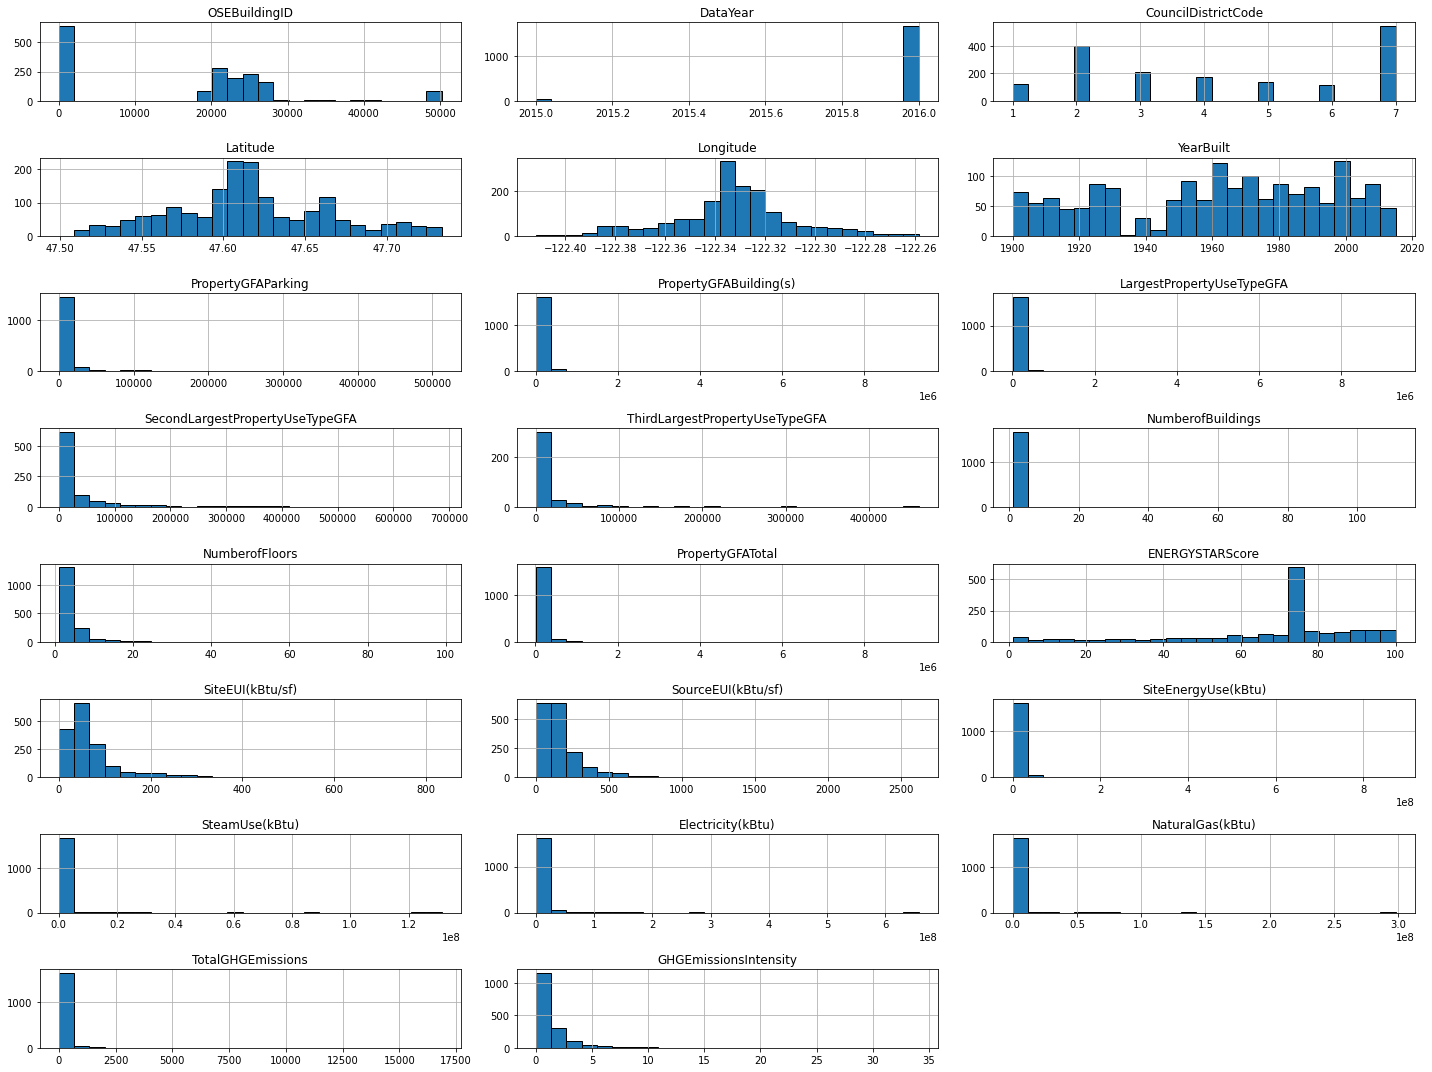

In [178]:
df.hist(bins=25, figsize=(20, 15), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

We observe that many variables have a skewed distribution, with a significant number showing a positive skew. This indicates that for these variables, most values are concentrated on the lower end, with a long tail of higher values. Skewed distributions may require transformation (logarithmic for exemple) to improve model performance or to meet assumptions of certain algorithms

## Correlations

In this step, you are removing surface area and specific energy measurement variables (`SteamUse(kBtu)`, `Electricity(kBtu)`, `NaturalGas(kBtu)`, `SiteEUI(kBtu/sf`), and `SourceEUI(kBtu/sf)` from the dataset before calculating correlations.

In [179]:
df = df.drop(['SteamUse(kBtu)','Electricity(kBtu)',
              'NaturalGas(kBtu)','SiteEUI(kBtu/sf)',
              'SourceEUI(kBtu/sf)'], axis=1)

These variables are likely removed to avoid multicollinearity and data leakage. Since they are highly correlated with the target variables related to energy use and emissions, keeping them in the dataset could distort the correlation matrix, making it difficult to identify other meaningful relationships. Removing these variables helps focus on independent features that may contribute unique information to the model.

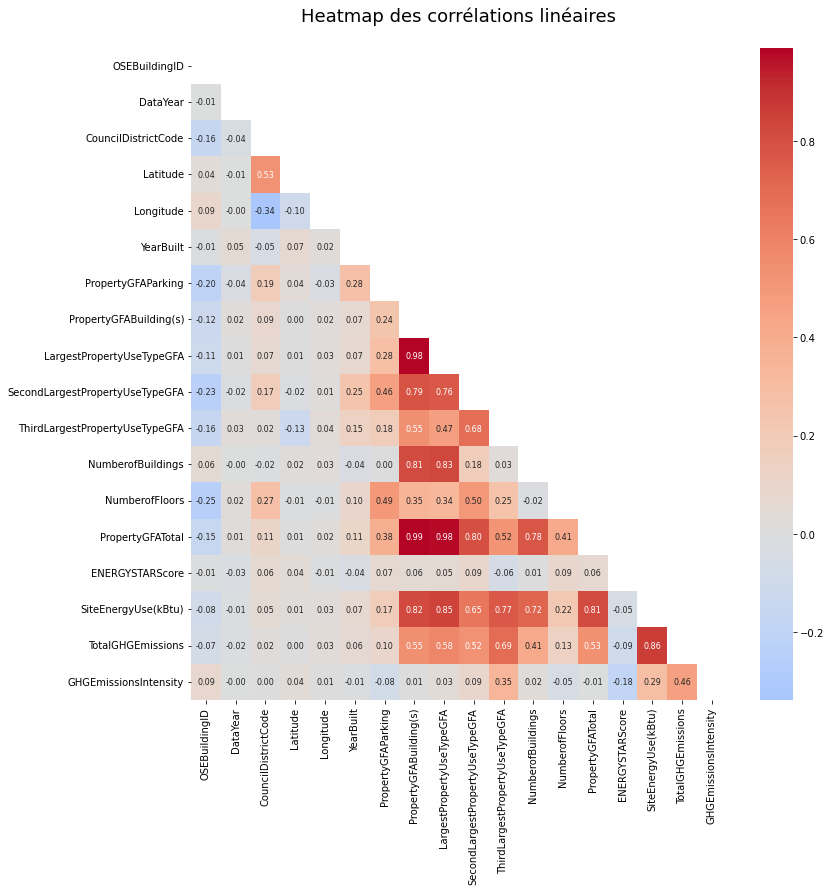

In [180]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

Significant correlations can be observed between :
- `PropertyGFATotal` and `PropertyGFABuilding(s)` / `LargestPropertyUseTypeGFA`
- `PropertyGBABuilding(s)` and `LargestPropertyUseTypeGFA`
- `TotalGHEmissions` and `SiteEnergyUse(kBtu)` / `NaturalGas(kBtu)`

We identify pairs of variables with a high correlation (above 0.7) to detect redundancy. Strongly correlated features can cause multicollinearity, so identifying these pairs helps guide feature reduction and improve model performance.

In [181]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                         level_1  \
28                 PropertyGFATotal          PropertyGFABuilding(s)   
26           PropertyGFABuilding(s)       LargestPropertyUseTypeGFA   
24                 PropertyGFATotal       LargestPropertyUseTypeGFA   
22              SiteEnergyUse(kBtu)               TotalGHGEmissions   
20        LargestPropertyUseTypeGFA             SiteEnergyUse(kBtu)   
18        LargestPropertyUseTypeGFA               NumberofBuildings   
16              SiteEnergyUse(kBtu)          PropertyGFABuilding(s)   
14           PropertyGFABuilding(s)               NumberofBuildings   
12              SiteEnergyUse(kBtu)                PropertyGFATotal   
10  SecondLargestPropertyUseTypeGFA                PropertyGFATotal   
8   SecondLargestPropertyUseTypeGFA          PropertyGFABuilding(s)   
6                  PropertyGFATotal               NumberofBuildings   
4               SiteEnergyUse(kBtu)  ThirdLargestPropertyUseTypeGFA   
2   SecondLargestPropertyUseTypeGFA       LargestPropertyUseTypeGFA   
0                 NumberofBuildings             SiteEnergyUse(kBtu)   

    corr_coeff  
28    0.989849  
26    0.981426  
24    0.977763  
22    0.861909  
20    0.845238  
18    0.831479  
16    0.822665  
14    0.812429  
12    0.810283  
10    0.802642  
8     0.786523  
6     0.776121  
4     0.766810  
2     0.762526  
0     0.724327

We notice that the variables suffixed GFA (surface) present strong correlations with several other variables. We will therefore create new variables to try to erase these linear correlations:

Note: Although this code below appears in the correlation analysis section, it is actually part of the data preparation process. Here, we extract unique building use types from the `ListOfAllPropertyUseTypes` column. This step is helpful for understanding property diversity and for possible future transformations, but it is not directly related to the correlation analysis.

In [182]:
def split_words(df, column = None):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

list_use_type = split_words(df, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 117


We create a new variable `TotalUseTypeNumber` to represent the total number of uses for each building, based on the `ListOfAllPropertyUseTypes` column. This gives us a simplified view of usage diversity.

In [183]:
df['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in df['ListOfAllPropertyUseTypes'].str.split(',')]
df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

Next, we extract the GFA (surface) variables for each building. These features, which include areas for different components like parking and building, will be prepared for further transformations, such as normalization relative to the total area.

In [184]:
gfa_features = search_componant(df, suffix='GFA')
df[['TotalUseTypeNumber'] + gfa_features].head(10)

TotalUseTypeNumber  PropertyGFAParking  PropertyGFABuilding(s)  \
0                   1                   0                  111077   
1                   1               25920                   72450   
2                   5               37854                  155934   
3                   2               21410                   55188   
4                   2                   0                  186971   
5                   1                   0                   66968   
6                   2              250000                  184475   
7                   2               32160                  160800   
8                   1                   0                   63150   
9                   1                   0                   54171   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                    43585.5                              NaN   
1                    98370.0                              NaN   
2                   138672.0                          47539.0   
3                    55188.0                          21410.0   
4                   186977.0                         115477.0   
5                    43585.5                              NaN   
6                   434475.0                         250000.0   
7                   135173.0                          32000.0   
8                    43585.5                              NaN   
9                    43585.5                              NaN   

   ThirdLargestPropertyUseTypeGFA  PropertyGFATotal  
0                             NaN          111077.0  
1                             NaN           98370.0  
2                         11166.0          193788.0  
3                             NaN           76598.0  
4                             NaN          186971.0  
5                             NaN           66968.0  
6                             NaN          434475.0  
7                             NaN          192960.0  
8                             NaN           63150.0  
9                             NaN           54171.0

Next we :
- Calculate the ratios of building and parking surface areas as a percentage of the total surface (PropertyGFATotal), creating GFABuildingRate and GFAParkingRate.  
- Drop the original surface variables to avoid redundancy
- Finally, we impute missing values in LargestPropertyUseType with "Unknown" and in NumberofFloors with 1, ensuring completeness for further analysis.

In [185]:
# Calcul des ratios
df['GFABuildingRate'] = (round((df['PropertyGFABuilding(s)'].fillna(0)
                                  /df['PropertyGFATotal'].fillna(0)),5))
df['GFAParkingRate'] = (round((df['PropertyGFAParking'].fillna(0)
                                 /df['PropertyGFATotal'].fillna(0)),5))

# Suppression des variables inutiles
df.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#On complète les usages de la partie la plus large
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna("Unknown")
df['NumberofFloors'] = df['NumberofFloors'].fillna(1)

We create two variables, `GFAPerBuilding` and `GFAPerFloor` to represent the average surface area per building and per floor, respectively. These normalized metrics help standardize comparisons of building sizes across entries

In [186]:
df['GFAPerBuilding'] = round((df['PropertyGFATotal'] / df['NumberofBuildings']),3)
df['GFAPerFloor'] = round((df['PropertyGFATotal'] / df['NumberofFloors']),3)

Let's check the impact of this feature engineering on the linear correlation matrix:

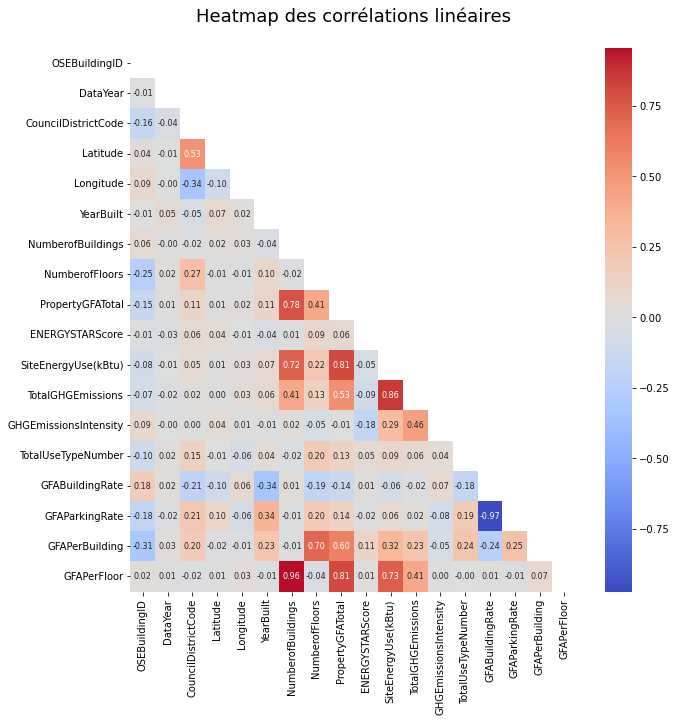

In [187]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

In [188]:
threshold_up = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0              level_1  corr_coeff
14          GFAPerFloor    NumberofBuildings    0.955073
12  SiteEnergyUse(kBtu)    TotalGHGEmissions    0.861909
10  SiteEnergyUse(kBtu)     PropertyGFATotal    0.810283
8      PropertyGFATotal          GFAPerFloor    0.809081
6      PropertyGFATotal    NumberofBuildings    0.776121
4   SiteEnergyUse(kBtu)          GFAPerFloor    0.730897
2     NumberofBuildings  SiteEnergyUse(kBtu)    0.724327
0       GFABuildingRate       GFAParkingRate   -0.973084

The feature engineering process had a positive impact by reducing redundant correlations and normalizing values into meaningful ratios. This transformation improved data quality for modeling by minimizing multicollinearity and enhancing interpretability of linear relationships.

## Target variables analysis

As a reminder, the variables to be predicted are `TotalGHGEmissions` and `SiteEnergyUse(kBtu)`.

We can visualize the distribution of the target variable `TotalGHGEmissions` with a histogram and a density plot. 

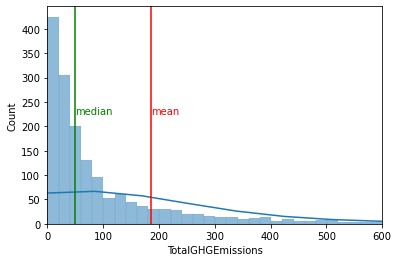

In [189]:
sns.histplot(data=df, x="TotalGHGEmissions",kde=True)
plt.axvline(x=df.TotalGHGEmissions.mean(), color='red')
plt.axvline(x=df.TotalGHGEmissions.median(), color='green')
plt.text(df.TotalGHGEmissions.mean(),225, 'mean', color='r', fontsize=10)
plt.text(df.TotalGHGEmissions.median(),225, 'median', color='green', fontsize=10)
plt.xlim(0,600)
plt.show()

 The mean (red line) and median (green line) are displayed to highlight the skewness in the distribution. The significant difference between the mean and median suggests a right-skewed distribution, indicating the presence of high emission outliers and high variance. This insight may guide potential transformations for better model performance.

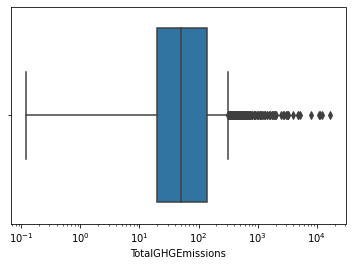

In [190]:
ax = sns.boxplot(x=df["TotalGHGEmissions"])
ax.set_xscale('log')

We plot a boxplot of `TotalGHGEmissions` with a logarithmic scale on the x-axis to better visualize the distribution and outliers. The log scale highlights the concentration of most values within a narrow range, while outliers extend far to the right. This confirms the high variance and supports the potential benefit of a logarithmic transformation for normalization.

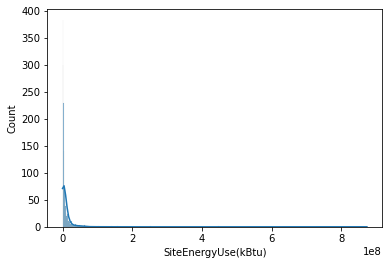

In [191]:
sns.histplot(data=df, x="SiteEnergyUse(kBtu)",kde=True)
plt.show()

We plot the distribution of the second target variable `SiteEnergyUse(kBtu)` using a histogram and density plot. The distribution is highly right-skewed, with most values concentrated near zero and a long tail of extreme values. Again,this suggests potential outliers and supports the idea of a logarithmic transformation to normalize the distribution.

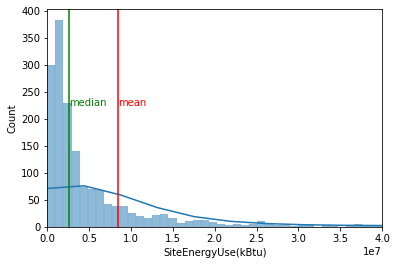

In [192]:
ax = sns.histplot(data=df, x="SiteEnergyUse(kBtu)",kde=True)
ax.axvline(x=df['SiteEnergyUse(kBtu)'].mean(), color='red')
ax.axvline(x=df['SiteEnergyUse(kBtu)'].median(), color='green')
ax.text(df['SiteEnergyUse(kBtu)'].mean(),225, 'mean', color='r', fontsize=10)
ax.text(df['SiteEnergyUse(kBtu)'].median(),225, 'median', color='green', fontsize=10)
ax.set_xlim(0,0.4*1e8)
plt.show()

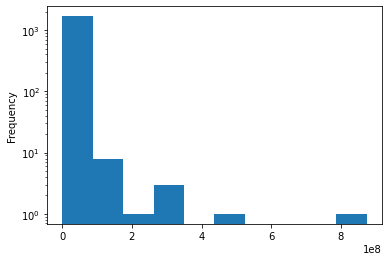

In [193]:
ax =df['SiteEnergyUse(kBtu)'].plot.hist()
ax.set_yscale('log')

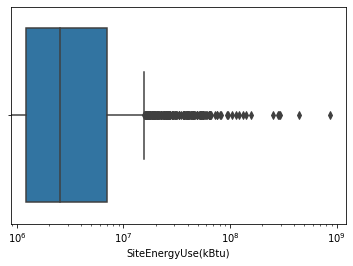

In [194]:
ax = sns.boxplot(x=df["SiteEnergyUse(kBtu)"])
ax.set_xscale('log')

We observe a similar pattern in SiteEnergyUse(kBtu) as seen with TotalGHGEmissions: a right-skewed distribution with most values clustered near zero and a few high outliers extending to the right. This reinforces the need for a potential logarithmic transformation to manage extreme values and achieve a more balanced distribution

# Saving results

We save the cleaned DataFrame as a pickle file (df_cleaned.pickle) for efficient reuse. The pickle format preserves data types and structure, allowing us to reload the cleaned dataset quickly without repeating the preprocessing steps.

In [197]:
df.to_pickle('df_cleaned.pickle')

# Conclusion

In this notebook, we performed a thorough data cleaning and exploratory data analysis (EDA) on our dataset. Key steps included:

- Variable arrangement and typo correction: We standardized and reorganized variables, ensuring consistency in naming conventions, correcting typos, and refining categorical values for improved interpretability.
- Handling missing values: We addressed missing values by either imputing them with suitable estimates (such as median values) or removing irrelevant columns with high missing proportions.
- Removing redundant or highly correlated features: We identified and eliminated variables with strong correlations to reduce multicollinearity and simplify the dataset.
- Feature engineering: We created new features, such as building usage counts and area-based metrics, to enrich our dataset with additional insights.
- Univariate analysis: Visualizations helped us understand the distribution of each variable and identify outliers, skewness, and potential transformation needs.
By the end of this notebook, we have a cleaned and structured dataset ready for deeper analysis.

In the next notebook, we will move forward with:

1. More multivariate analysis: We will explore interactions and relationships between multiple variables simultaneously, aiming to uncover hidden patterns and insights. This will include more complex visualizations to understand the dataset’s structure in greater depth.

2. Modeling: We will apply machine learning models to predict target variables, `TotalGHGEmissions` and `SiteEnergyUse(kBtu)` and evaluate the impact of the `ENERGYSTARScore`. This phase will involve:
   - Selecting appropriate models: We'll evaluate models that suit the dataset's structure and prediction goals.
   - Feature selection and optimization: Identifying and fine-tuning the most relevant features to enhance model performance.
   - Evaluation: Using metrics like RMSE, MAE, and R² to assess the accuracy and reliability of our models.

The goal of the next notebook is to develop predictive models that provide accurate estimates for CO₂ emissions and energy use, potentially guiding strategies for energy efficiency and environmental impact reduction.